# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# Reading data


In [3]:
data = pd.read_csv(data = pd.read_csv(data = pd.read_csv('/Users/swapnilgadage/Documents/DataAnalytics/Achivment 6/netflix_titles.csv')
data2 = data.copy()


# Cleaning up the data

In [5]:
data2['listed_in'].value_counts()

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64

In [6]:
#funtion to get listed_in column into different columns for each categories
def func(str_val):
    list_val = str_val.split(",")
    output_dict = {}
    for item in list_val:
        output_dict[item] = 1
    return output_dict
    
data_categories = data2['listed_in'].apply(lambda x: func(x)).apply(pd.Series).fillna(0)

In [7]:
#concatinating both the data side by side
data2 = pd.concat([data, data_categories], axis=1)

# Cluster Analysis

In [59]:
#Let's create new columns for Series and Movies and extract their duration to the new columm, convert them to float

data2['Movies_duration'] = data2['duration'].str.extract('(\d+) min',expand=False).astype(float)
data2['TV_Seasons'] = data2['duration'].str.extract('(\d+) Season', expand=False).astype(float)

data2.fillna(0)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Spanish-Language TV Shows,Classic & Cult TV,Music & Musicals,Romantic Movies,LGBTQ Movies,Stand-Up Comedy,TV Sci-Fi & Fantasy,Sports Movies,Movies_duration,TV_Seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,0,United States,"September 25, 2021",2020,PG-13,90 min,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0
1,s2,TV Show,Blood & Water,0,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",0,"September 24, 2021",2021,TV-MA,1 Season,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,s4,TV Show,Jailbirds New Orleans,0,0,0,"September 24, 2021",2021,TV-MA,1 Season,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,s5,TV Show,Kota Factory,0,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,158.0,0.0
8803,s8804,TV Show,Zombie Dumb,0,0,0,"July 1, 2019",2018,TV-Y7,2 Seasons,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,0.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,0.0


In [60]:
data2['type'] = pd.factorize(data2['type'])[0]
data2['director'] = pd.factorize(data2['director'])[0]
data2['country'] = pd.factorize(data2['country'])[0]
data2['rating'] = pd.factorize(data2['rating'])[0]

In [61]:
X_feats = np.setdiff1d(data2.columns, ['show_id','title','cast','date_added', 'listed_in','duration','description'])

In [62]:
#bringing features into dataframe
data_for_clustering = data2[X_feats]

In [63]:
data_for_clustering = data_for_clustering.fillna(0)

# Importing Umap

In [64]:
import umap

In [65]:
#squishing all the features into two columns
model = umap.UMAP(random_state=42)
train_umap_embeddings = model.fit_transform(data_for_clustering)

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [66]:
trainUmap = pd.DataFrame(train_umap_embeddings)
trainUmap.columns = ['col1', 'col2'] #renaming the columns after tranforming the data

In [67]:
from sklearn.cluster import KMeans

Kmeans = KMeans(n_clusters = 8, random_state=2023, n_init="auto").fit(trainUmap[['col1','col2']])
cluster_ids = Kmeans.labels_
trainUmap['cluster_ids'] = cluster_ids

In [68]:
trainUmap['cluster_ids'].value_counts()

cluster_ids
7    1519
0    1447
1    1217
2    1093
4     996
6     931
3     861
5     743
Name: count, dtype: int64

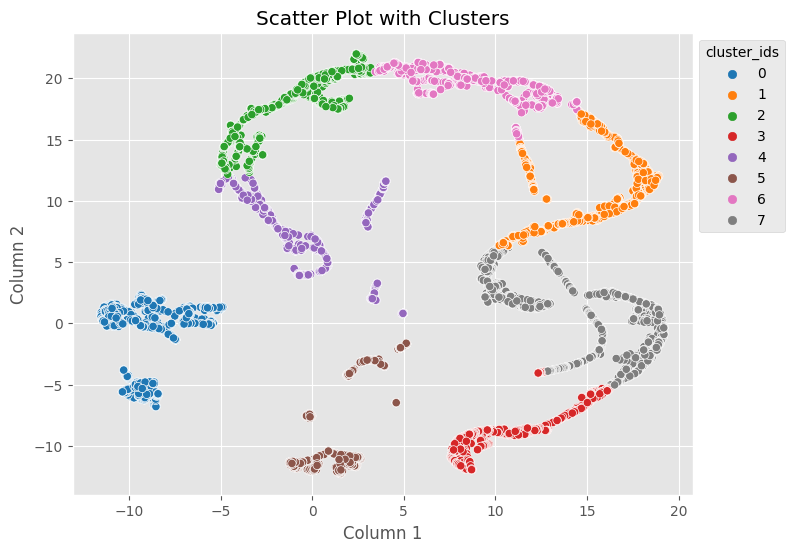

In [69]:
# Scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='col1', y='col2', hue='cluster_ids', data=trainUmap, palette='tab10')

# Add labels and title
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Scatter Plot with Clusters')

plt.legend(title='cluster_ids', loc='upper left', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

In this project, we worked on a text clustering problem wherein we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.